# Merchandise Popularity Prediction

#### Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

import warnings
warnings.filterwarnings('ignore')

#### Read the different datasets

In [2]:
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')
all_data = pd.concat([train_df, test_df])
all_data.head()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
0,0.407,0.00380,2,-35.865,1,0.9920,0.944,0.0988,0.1100,113.911,189125,4.0
1,0.234,0.10500,0,-19.884,1,0.9440,0.900,0.1290,0.0382,76.332,186513,4.0
2,0.668,0.72600,9,-7.512,1,0.0387,0.000,0.1340,0.4530,124.075,172143,4.0
3,0.184,0.00561,4,-34.357,1,0.8490,0.931,0.1110,0.0641,79.037,184000,5.0
4,0.231,0.13100,6,-22.842,1,0.9370,0.000,0.1090,0.0677,109.560,186507,3.0


#### EDA

In [3]:
def basic_eda(df):
    print('SHAPE')
    print(df.shape)
    print('.' * 100)
    print('\nINFO')
    print(df.info())
    print('.' * 100)
    print('\nMISSING VALUES')
    print('Total Missing:', df.isna().sum().sum())
    print(df.isna().sum())
    print('.' * 100)
    print('\nDUPLICATES')
    print(df.duplicated().sum())
    print('.' * 100)  
    print('\nDESCRIBE')
    print(df.describe())

In [4]:
basic_eda(train_df)

SHAPE
(18208, 12)
....................................................................................................

INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18208 entries, 0 to 18207
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store_Ratio     18208 non-null  float64
 1   Basket_Ratio    18208 non-null  float64
 2   Category_1      18208 non-null  int64  
 3   Store_Score     18208 non-null  float64
 4   Category_2      18208 non-null  int64  
 5   Store_Presence  18208 non-null  float64
 6   Score_1         18208 non-null  float64
 7   Score_2         18208 non-null  float64
 8   Score_3         18208 non-null  float64
 9   Score_4         18208 non-null  float64
 10  time            18208 non-null  int64  
 11  popularity      18208 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB
None
.................................................................................

In [5]:
basic_eda(test_df)

SHAPE
(12140, 11)
....................................................................................................

INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12140 entries, 0 to 12139
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store_Ratio     12140 non-null  float64
 1   Basket_Ratio    12140 non-null  float64
 2   Category_1      12140 non-null  int64  
 3   Store_Score     12140 non-null  float64
 4   Category_2      12140 non-null  int64  
 5   Store_Presence  12140 non-null  float64
 6   Score_1         12140 non-null  float64
 7   Score_2         12140 non-null  float64
 8   Score_3         12140 non-null  float64
 9   Score_4         12140 non-null  float64
 10  time            12140 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 1.0 MB
None
....................................................................................................

MISSING VALUES
Total Mis

In [6]:
basic_eda(all_data)

SHAPE
(30348, 12)
....................................................................................................

INFO
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30348 entries, 0 to 12139
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store_Ratio     30348 non-null  float64
 1   Basket_Ratio    30348 non-null  float64
 2   Category_1      30348 non-null  int64  
 3   Store_Score     30348 non-null  float64
 4   Category_2      30348 non-null  int64  
 5   Store_Presence  30348 non-null  float64
 6   Score_1         30348 non-null  float64
 7   Score_2         30348 non-null  float64
 8   Score_3         30348 non-null  float64
 9   Score_4         30348 non-null  float64
 10  time            30348 non-null  int64  
 11  popularity      18208 non-null  float64
dtypes: float64(9), int64(3)
memory usage: 3.0 MB
None
.................................................................................

In [7]:
print('Unique values in the dataset:\n')

for i in all_data.columns:
    print('_' * 50)
    print(i + ':', all_data[i].nunique(), 'unique values')
    print(all_data[i].value_counts())

Unique values in the dataset:

__________________________________________________
Store_Ratio: 1120 unique values
0.5320    86
0.5750    86
0.6090    84
0.6410    81
0.6400    81
          ..
0.0894     1
0.0732     1
0.0995     1
0.0835     1
0.9980     1
Name: Store_Ratio, Length: 1120, dtype: int64
__________________________________________________
Basket_Ratio: 2169 unique values
1.00000    72
0.78300    64
0.72900    60
0.59800    55
0.71600    54
           ..
0.00450     1
0.00584     1
0.00372     1
0.00877     1
0.00987     1
Name: Basket_Ratio, Length: 2169, dtype: int64
__________________________________________________
Category_1: 12 unique values
0     3767
7     3392
2     3220
9     2793
1     2744
5     2703
4     2287
11    2111
8     2071
10    1992
6     1935
3     1333
Name: Category_1, dtype: int64
__________________________________________________
Store_Score: 14072 unique values
-4.410     17
-5.851     16
-6.039     14
-7.109     14
-7.862     13
           ..
-

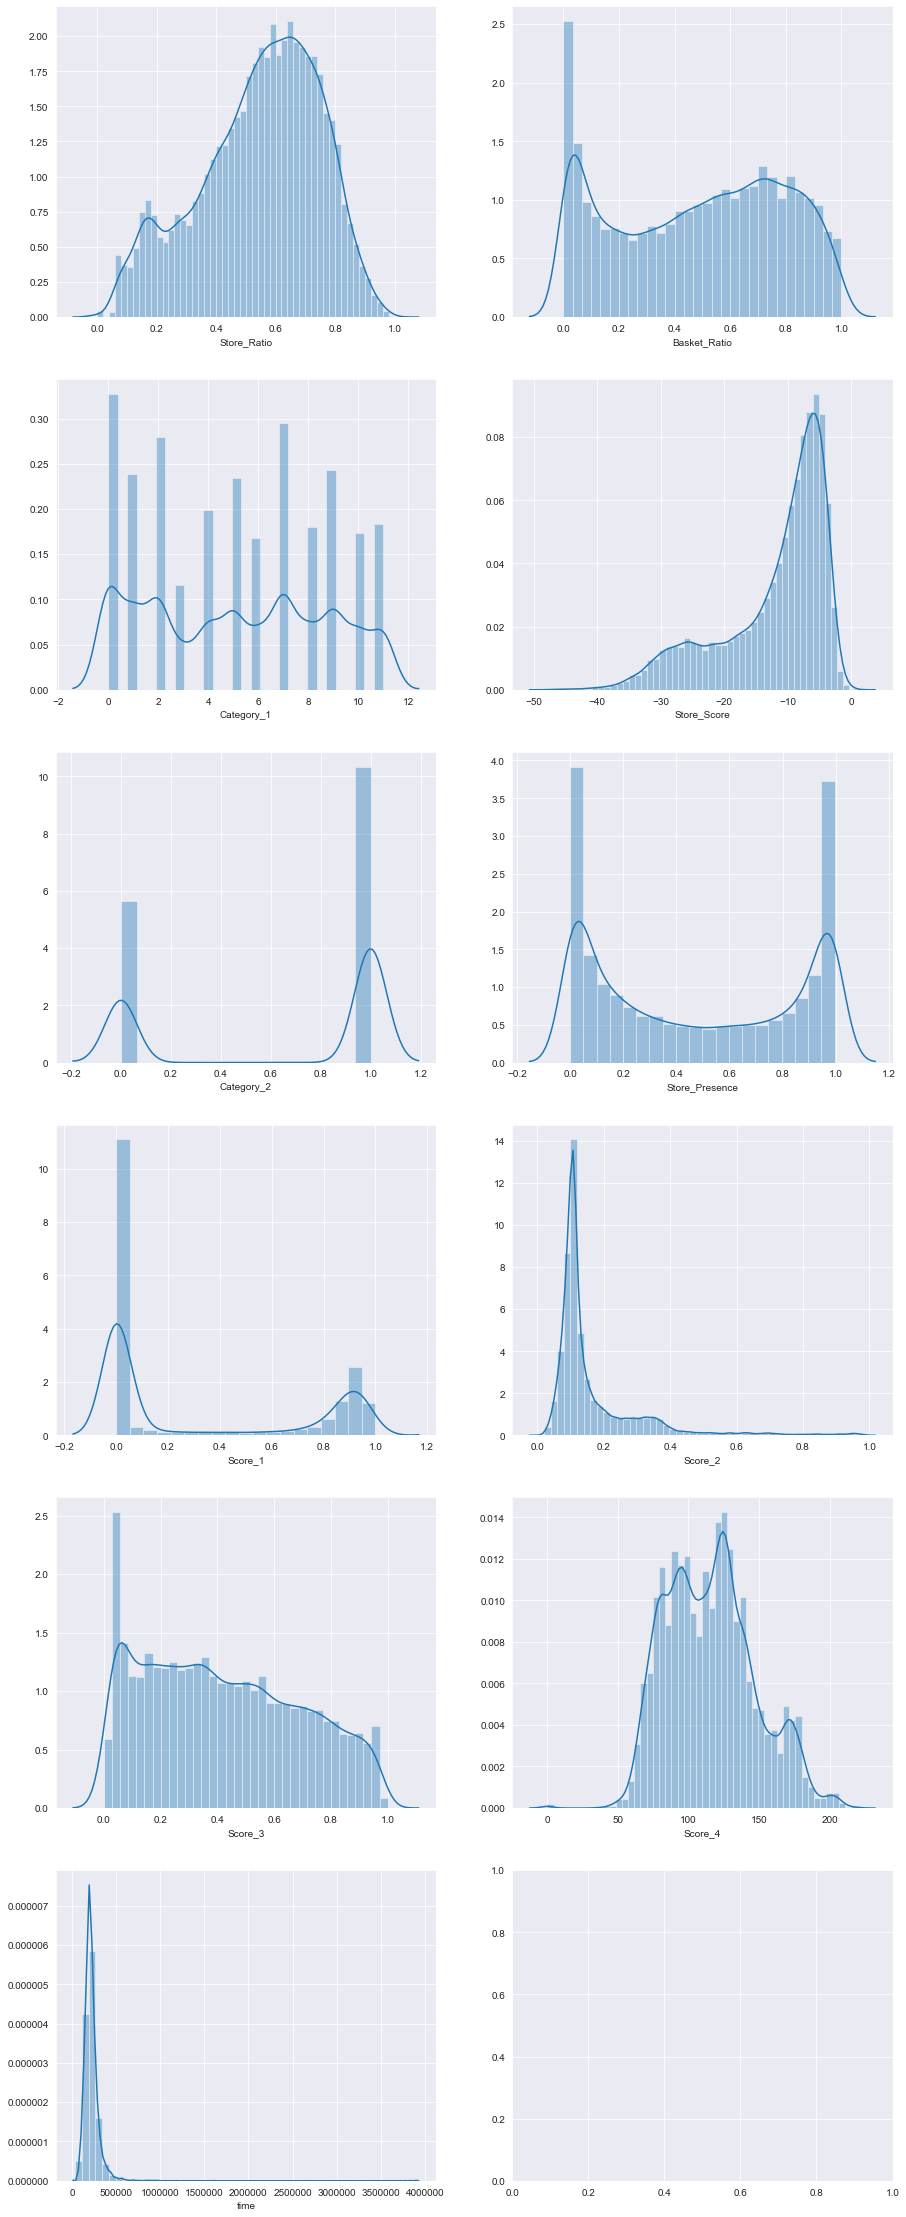

In [8]:
fig, ax = plt.subplots(figsize = (15, 40), nrows = 6, ncols = 2)

for i, col in enumerate(all_data.columns[:-1]):
    try:
        sns.distplot(all_data[col], ax = ax[i//2, i%2])
    except:
        sns.distplot(all_data[col], ax = ax[i//2, i%2], kde = False)

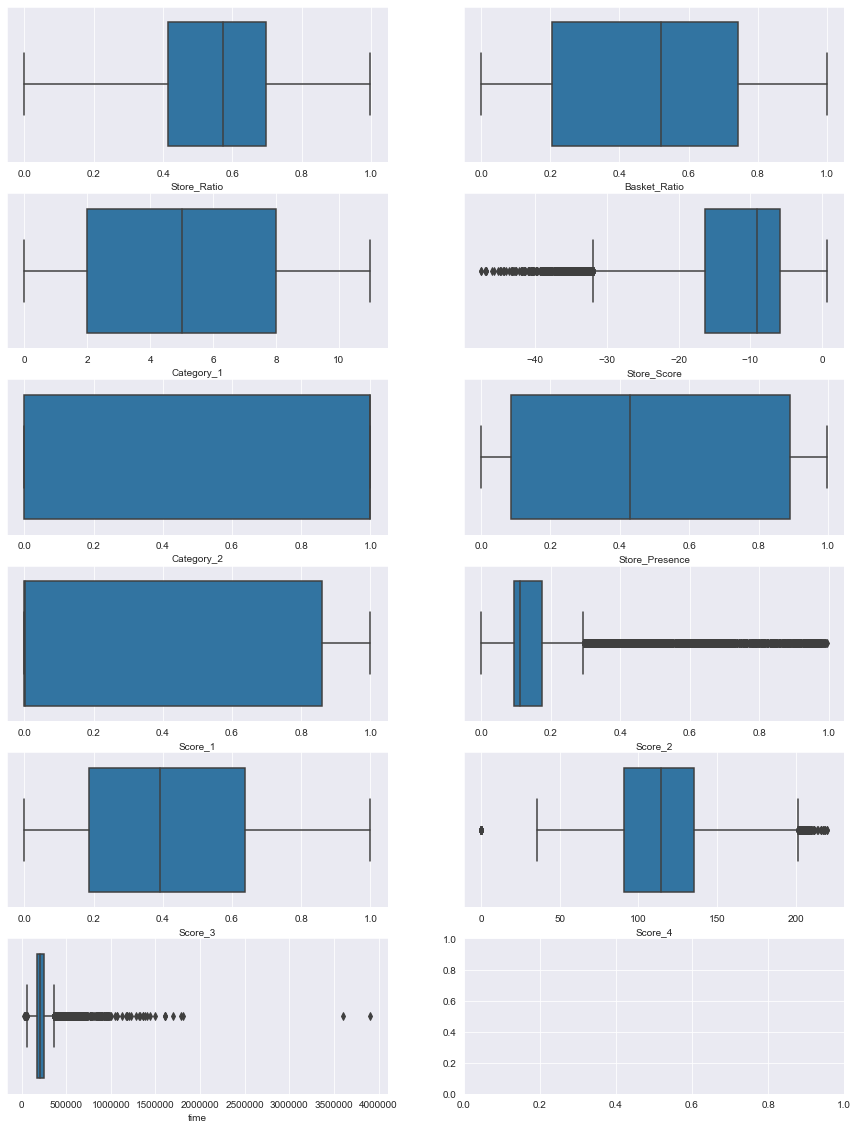

In [9]:
fig, ax = plt.subplots(figsize = (15, 20), nrows = 6, ncols = 2)

for i, col in enumerate(all_data.columns[:-1]):
    sns.boxplot(all_data[col], ax = ax[i//2, i%2])

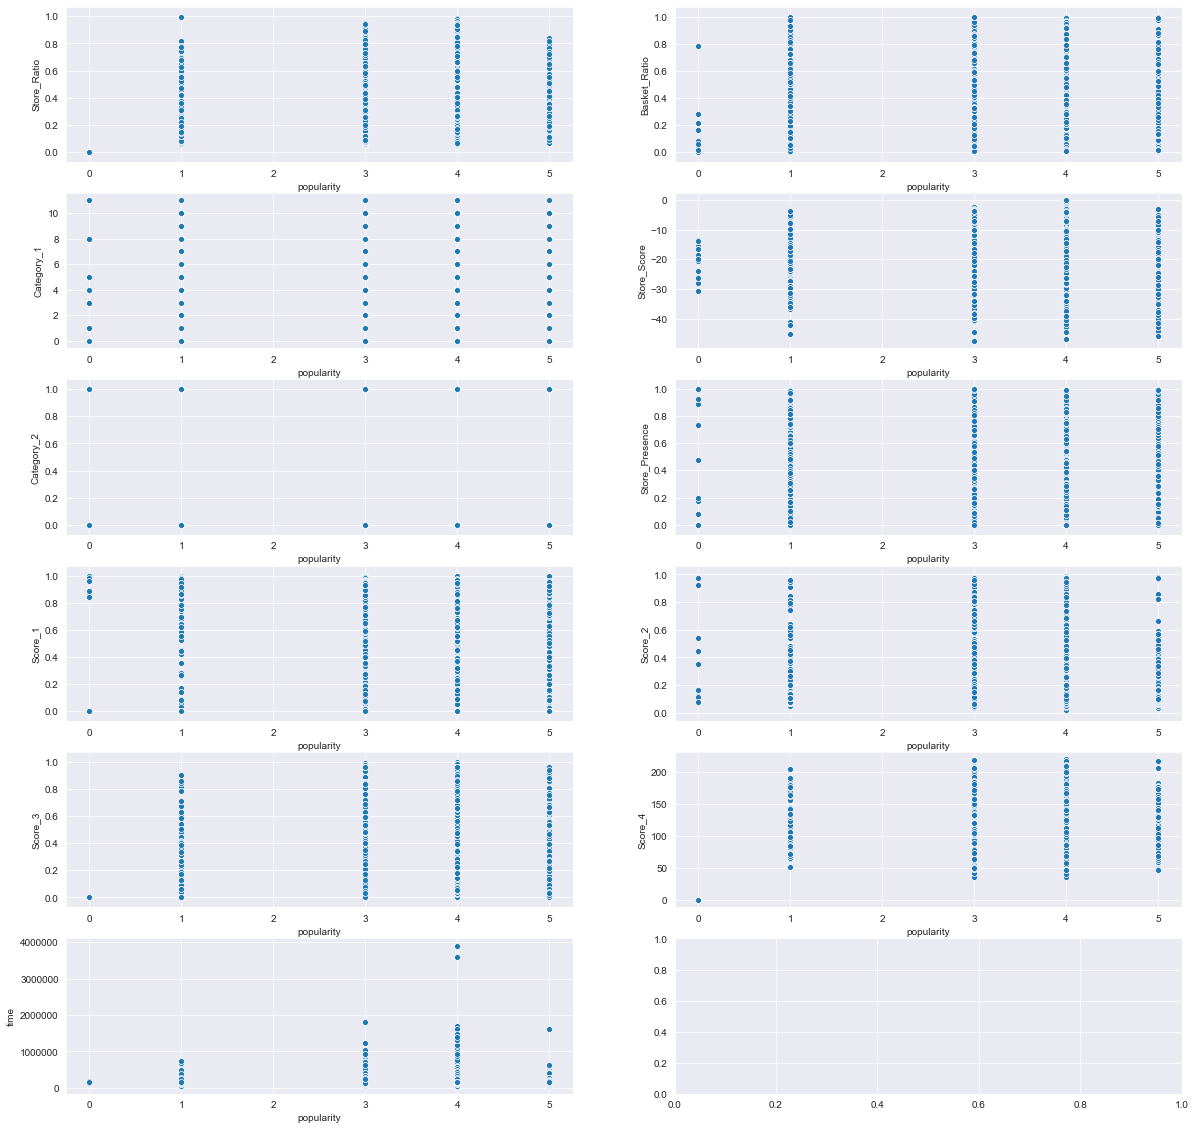

In [10]:
fig, ax = plt.subplots(figsize = (20, 20), nrows = 6, ncols = 2)

for i, col in enumerate(all_data.columns[:-1]):
    sns.scatterplot(x = all_data['popularity'], y = all_data[col], ax = ax[i//2, i%2])

In [11]:
all_data.skew().sort_values()

popularity       -3.051638
Store_Score      -1.153862
Category_2       -0.611876
Store_Ratio      -0.459827
Basket_Ratio     -0.127770
Category_1        0.045641
Store_Presence    0.114663
Score_3           0.274980
Score_4           0.384165
Score_1           0.624832
Score_2           2.883409
time              7.228752
dtype: float64

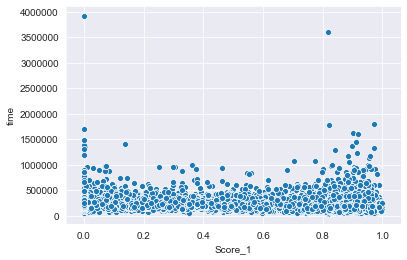

In [12]:
sns.scatterplot(x = all_data['Score_1'], y = all_data['time'])

In [13]:
abs(all_data.corr()['popularity']).sort_values(ascending = False)

popularity        1.000000
Store_Ratio       0.232888
Store_Score       0.204896
Basket_Ratio      0.200988
Store_Presence    0.195113
Score_3           0.176765
Score_1           0.163667
Score_4           0.043677
Category_2        0.034565
time              0.020172
Category_1        0.003716
Score_2           0.001737
Name: popularity, dtype: float64

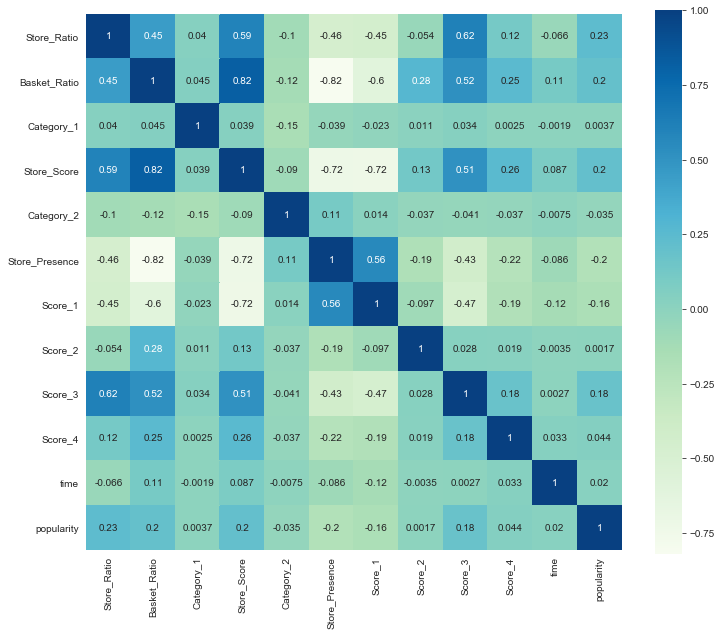

In [14]:
plt.figure(figsize = (12, 10))
sns.heatmap(all_data.corr(), annot = True, cmap = 'GnBu', square = True)

In [15]:
all_data.corr()[['Score_1', 'Score_3', 'Score_2', 'Score_4']]

# Score 2, 3 & 4 appear to have a similar pattern while Score 1 is opposite

,Score_1,Score_3,Score_2,Score_4
Store_Ratio,-0.445916,0.615427,-0.053524,0.117398
Basket_Ratio,-0.604467,0.519973,0.276431,0.253519
Category_1,-0.022670,0.034393,0.011349,0.002526
Store_Score,-0.721046,0.512866,0.132151,0.260608
Category_2,0.013631,-0.041123,-0.036902,-0.037248
Store_Presence,0.561269,-0.425188,-0.186250,-0.221232
Score_1,1.000000,-0.470220,-0.097337,-0.193533
Score_2,-0.097337,0.027907,1.000000,0.019345
Score_3,-0.470220,1.000000,0.027907,0.181636
Score_4,-0.193533,0.181636,0.019345,1.000000


#### Feature Engineering

In [16]:
# the time variable has 2 extreme outlier points - removing them

all_data.reset_index(drop = True, inplace = True)
all_data.drop(all_data.sort_values('time', ascending = False).index[:2], inplace = True)
all_data.reset_index(drop = True, inplace = True)

In [17]:
all_data['time'] = np.log1p(all_data['time'])

all_data['Store_Score'] = (all_data['Store_Score'] - all_data['Store_Score'].min()) / (all_data['Store_Score'].max() - all_data['Store_Score'].min())

all_data['Score_4'] = (all_data['Score_4'] - all_data['Score_4'].min()) / (all_data['Score_4'].max() - all_data['Score_4'].min())

all_data['Store+Basket_Ratio_Avg'] = (all_data['Store_Ratio'] + all_data['Basket_Ratio']) / 2

all_data['Store*Store_Ratio_Sq'] = (all_data['Store_Ratio'] * all_data['Score_3']) ** 2

all_data['Store*Basket_Ratio_Sq'] = (all_data['Basket_Ratio'] * all_data['Score_3']) ** 2

all_data['Store_Score+Presence_Avg'] = (all_data['Store_Score'] + all_data['Store_Presence']) / 2

all_data['Avg_Score_2_3_4'] = (all_data['Score_2'] + all_data['Score_3'] + all_data['Score_4'])/3

### Modeling

In [18]:
train_df = all_data[:18206]
test_df = all_data[18206:]

In [19]:
X = train_df.drop(['popularity', 'Category_1'], axis = 1)
y = train_df['popularity']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

test = test_df.drop(['popularity', 'Category_1'], axis = 1)

In [20]:
cv_model1 = cross_val_score(XGBClassifier(objective = 'multi:softmax',
                                          booster = 'dart',
                                          tree_method = 'approx',
                                          n_estimators = 129,
                                          max_depth = 8,
                                          learning_rate = 0.1,
                                          gamma = 0.3,
                                          colsample_bytree = 0.8,
                                          reg_lambda = 0.8,              
                                          random_state = 1, 
                                          n_jobs = -1,), 
            X, y, groups = None, scoring = 'neg_log_loss', 
            cv = 5, n_jobs = -1, verbose = 0)

print(cv_model1.mean())  

-0.39933165088349143


In [21]:
cv_model2 = cross_val_score(CatBoostClassifier(n_estimators = 1150,
                                               depth = 7,
                                               random_strength = 0.7,
                                               random_state = 1), 
            X, y, groups = None, scoring = 'neg_log_loss', 
            cv = 5, n_jobs = -1, verbose = 0)

print(cv_model2.mean())  

-0.4078336800743565


In [22]:
cv_model3 = cross_val_score(LogisticRegression(multi_class = 'multinomial', 
                                               max_iter = 900,
                                               C = 0.8,
                                               random_state = 1, 
                                               n_jobs = -1), 
            X, y, groups = None, scoring = 'neg_log_loss', 
            cv = 5, n_jobs = -1, verbose = 0)

print(cv_model3.mean())  

-0.48164432004846525


In [23]:
xgb = XGBClassifier(objective = 'multi:softmax', booster = 'dart', tree_method = 'approx',
                    n_estimators = 129, max_depth = 8, learning_rate = .1, gamma = .3,
                    colsample_bytree = 0.8, reg_lambda = 0.8, random_state = 1, n_jobs = -1)


catb = CatBoostClassifier(n_estimators = 1150, depth = 7, random_strength = 0.7, random_state = 1)


logit = LogisticRegression(multi_class = 'multinomial', max_iter = 900, C = 0.8, random_state = 1, n_jobs = -1)

In [24]:
# Stacking Classifier

estimators = [('xgb', xgb), ('cat', catb)]

stack_clf = StackingClassifier(estimators = estimators, 
                               final_estimator = logit,
                               n_jobs = -1)

stack_clf.fit(X, y)
stack_pred = stack_clf.predict_proba(test)
stack_pred

array([[1.07107616e-03, 2.89375327e-02, 8.60718138e-01, 7.07662561e-02,
        3.85069967e-02],
       [8.40817745e-05, 5.74688145e-03, 3.67738090e-02, 9.49552625e-01,
        7.84260258e-03],
       [9.56716523e-05, 6.25311055e-03, 4.03266945e-02, 9.44184597e-01,
        9.13992622e-03],
       ...,
       [8.05473575e-05, 5.43622122e-03, 3.59307646e-02, 9.50971052e-01,
        7.58141450e-03],
       [8.34919256e-05, 5.63035547e-03, 3.66791026e-02, 9.49745024e-01,
        7.86202557e-03],
       [2.38829898e-04, 1.36981053e-02, 1.13152323e-01, 8.54680715e-01,
        1.82300265e-02]])

#### Submission

In [25]:
submission = pd.DataFrame(stack_pred, columns = [0, 1, 2, 3, 4])
submission.to_csv('submission.csv', index = False)
submission

,0,1,2,3,4
0,0.001071,0.028938,0.860718,0.070766,0.038507
1,0.000084,0.005747,0.036774,0.949553,0.007843
2,0.000096,0.006253,0.040327,0.944185,0.009140
3,0.000095,0.006187,0.040618,0.944165,0.008935
4,0.000078,0.005277,0.034491,0.952766,0.007387
...,...,...,...,...,...
12135,0.000359,0.018862,0.162912,0.791627,0.026241
12136,0.000078,0.005272,0.034534,0.952765,0.007351
12137,0.000081,0.005436,0.035931,0.950971,0.007581
12138,0.000083,0.005630,0.036679,0.949745,0.007862


#####    ========================= END =========================